In [6]:
import project_metrics.project_metrics as metrics
import numpy as np
import pandas as pd
import pickle
from os.path import exists

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [7]:
df_train = pd.read_csv("Assets/train.csv")
df_val= pd.read_csv("Assets/val.csv")
df_test = pd.read_csv("Assets/test.csv")

In [8]:
df_train.drop("INDEX", inplace=True, axis =1)
df_val.drop("INDEX", inplace=True, axis =1)
df_test.drop("INDEX", inplace=True, axis =1)

df_train.drop("Unnamed: 0", inplace=True, axis =1)
df_val.drop("Unnamed: 0", inplace=True, axis =1)
df_test.drop("Unnamed: 0", inplace=True, axis =1)

df_train.drop("IND_BOM_1_2", inplace=True, axis =1)
df_val.drop("IND_BOM_1_2", inplace=True, axis =1)
df_test.drop("IND_BOM_1_2", inplace=True, axis =1)

In [9]:
y_train = df_train["IND_BOM_1_1"].values
y_val = df_val["IND_BOM_1_1"].values
y_test = df_test["IND_BOM_1_1"].values

In [10]:
df_train.drop("IND_BOM_1_1", inplace=True, axis =1)
df_val.drop("IND_BOM_1_1", inplace=True, axis =1)
df_test.drop("IND_BOM_1_1", inplace=True, axis =1)

In [11]:
x_train = df_train.values
x_val = df_val.values
x_test = df_test.values

In [12]:
x_train.shape

(255098, 243)

# Final Project

## MLP

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

MODELS_PATH = "Models/MLP"
HISTORY_PATH = f"{MODELS_PATH}/history"
MODEL_PATH = f"{MODELS_PATH}/model"

### Experimento1

In [14]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(16, activation='relu', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "1.npy"
model_file = MODEL_PATH + "1"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=10_000, callbacks=[EarlyStopping(patience=10,verbose=1)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

2022-10-17 21:12:33.282405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 21:12:33.283189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 21:12:33.283371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-17 21:12:33.283422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-17 21:12:33.283477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model was already trained


   1/3041 [..............................] - ETA: 6:37

2022-10-17 21:12:33.917113: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94575600 exceeds 10% of free system memory.


3041/3041 [==============================] - 2s 574us/step
Matriz de confusão no conjunto de teste:


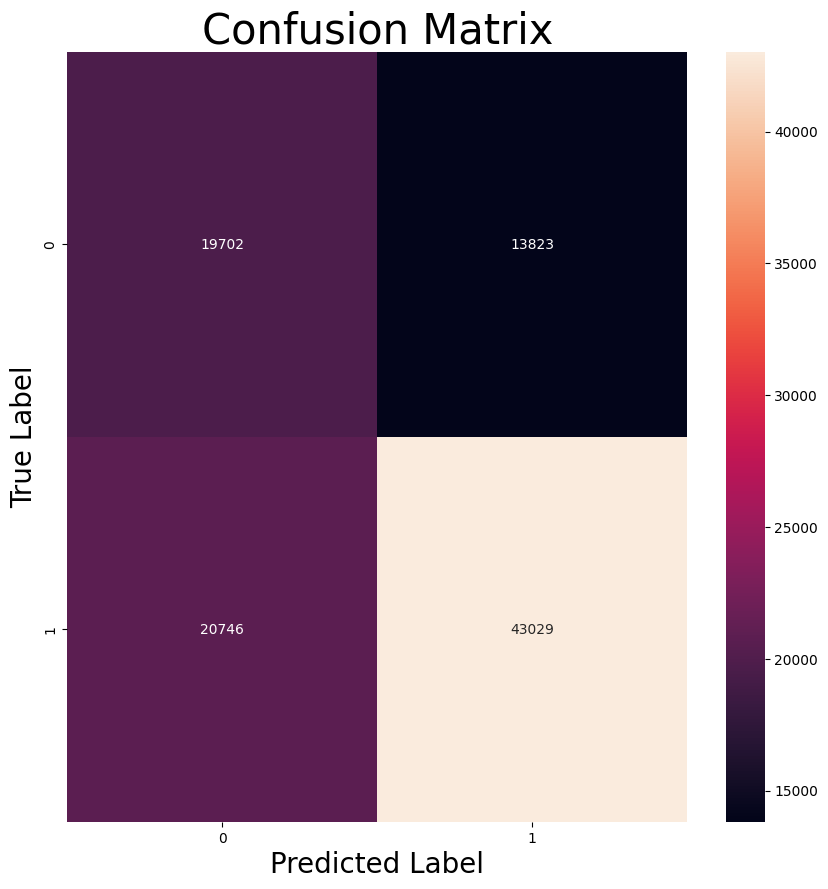


Train Loss:       0.2187
Validation Loss:  0.2214

Performance no conjunto de teste:


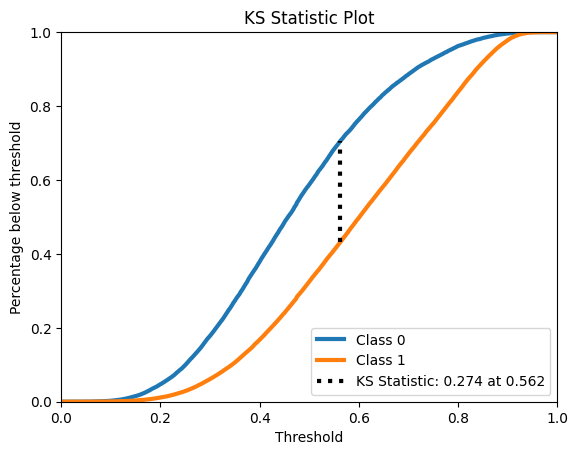


Accuracy:         0.6447
Recall:           0.6747
Precision:        0.7569
F1:               0.7134
AUROC:            0.6887
AUPR:             0.8014


In [15]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento2

In [16]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(256, activation='relu', input_dim=input_dim))
classifier.add(Dense(128, activation='relu', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "2.npy"
model_file = MODEL_PATH + "2"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=10_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


 137/3041 [>.............................] - ETA: 2s

2022-10-17 21:12:37.780783: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94575600 exceeds 10% of free system memory.


3041/3041 [==============================] - 2s 703us/step
Matriz de confusão no conjunto de teste:


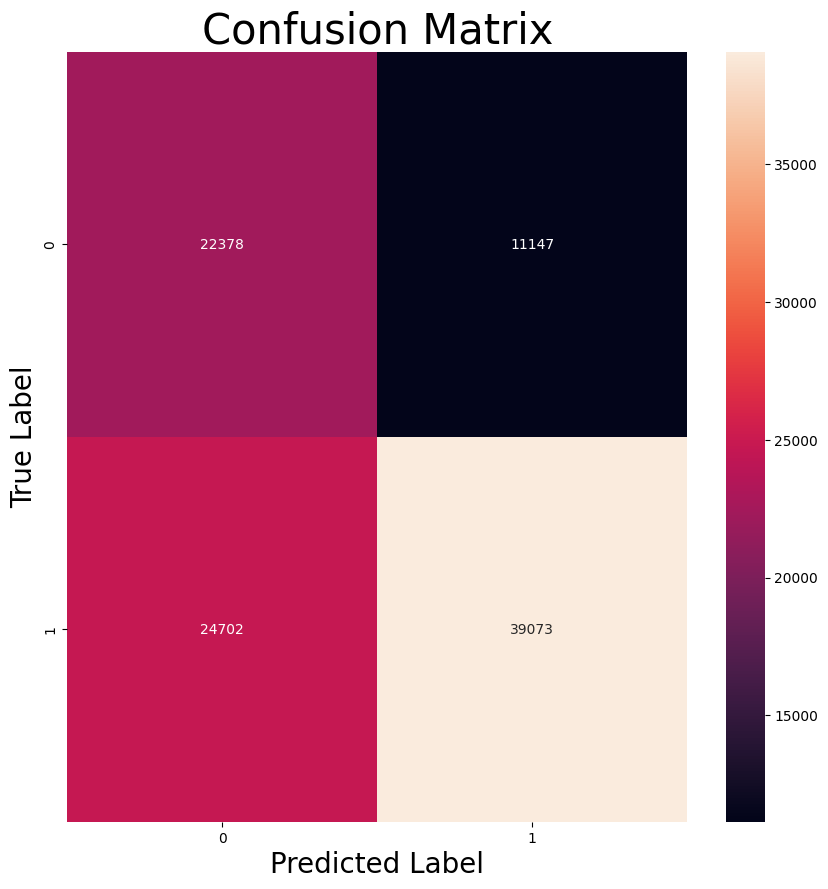


Train Loss:       0.2206
Validation Loss:  0.2213

Performance no conjunto de teste:


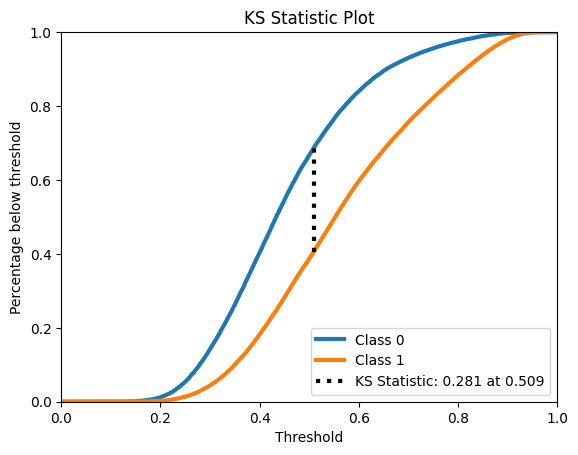


Accuracy:         0.6316
Recall:           0.6127
Precision:        0.7780
F1:               0.6855
AUROC:            0.6921
AUPR:             0.8042


In [17]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento3

In [18]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(512, activation='sigmoid', input_dim=input_dim))
classifier.add(Dense(256, activation='sigmoid', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))

optimizer=keras.optimizers.SGD( learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='mean_squared_error')

history_file = HISTORY_PATH + "3.npy"
model_file = MODEL_PATH + "3"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


 103/3041 [>.............................] - ETA: 2s

2022-10-17 21:12:41.530378: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94575600 exceeds 10% of free system memory.


3041/3041 [==============================] - 3s 994us/step
Matriz de confusão no conjunto de teste:


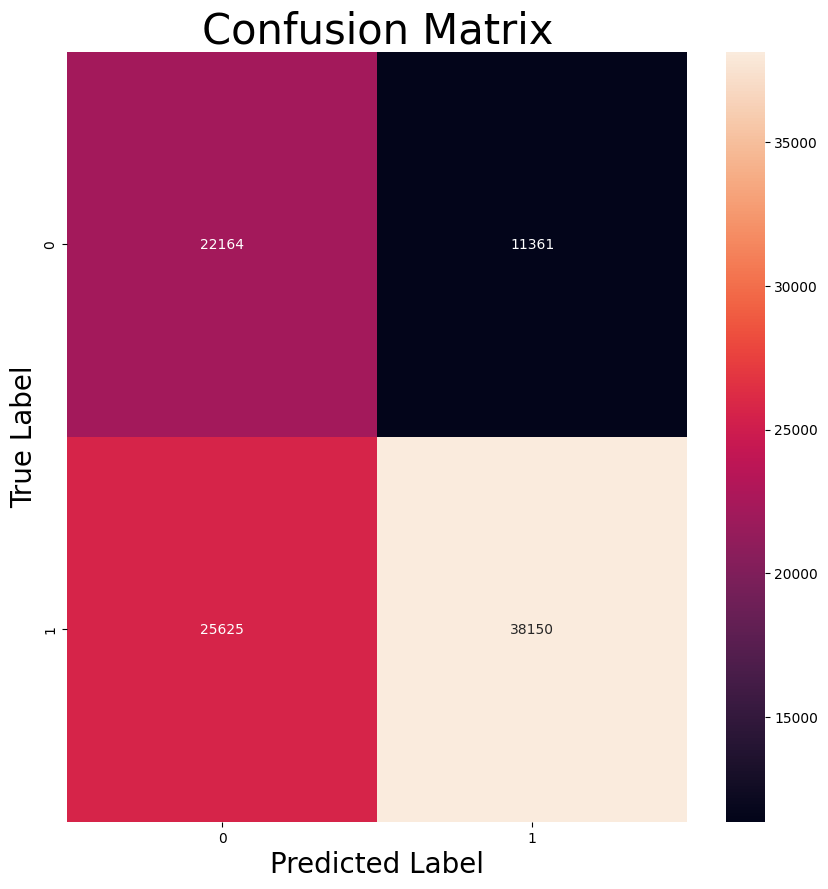


Train Loss:       0.2258
Validation Loss:  0.2255

Performance no conjunto de teste:


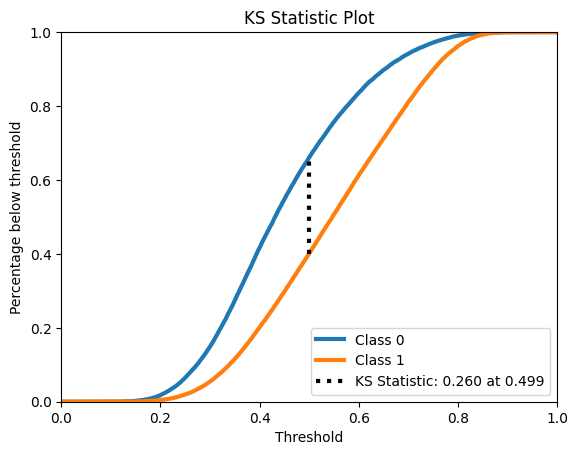


Accuracy:         0.6199
Recall:           0.5982
Precision:        0.7705
F1:               0.6735
AUROC:            0.6774
AUPR:             0.7885


In [19]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento4

In [20]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(512, activation='tanh', input_dim=input_dim))
classifier.add(Dense(256, activation='tanh', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))

optimizer=keras.optimizers.SGD( learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='mean_squared_error')

history_file = HISTORY_PATH + "4.npy"
model_file = MODEL_PATH + "4"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


2022-10-17 21:12:46.477805: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94575600 exceeds 10% of free system memory.


3041/3041 [==============================] - 3s 955us/step
Matriz de confusão no conjunto de teste:


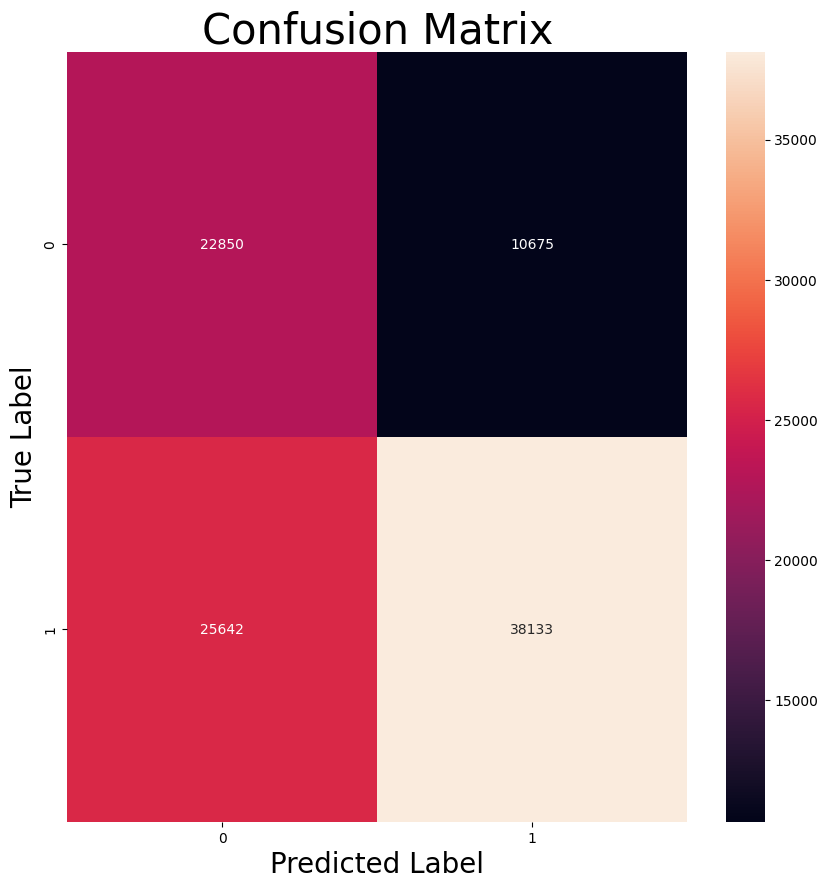


Train Loss:       0.2174
Validation Loss:  0.2212

Performance no conjunto de teste:


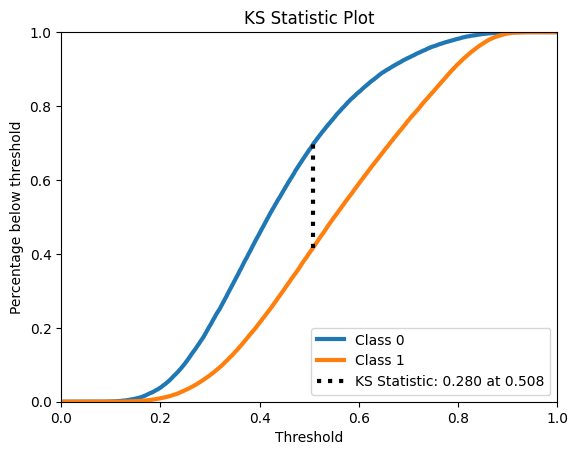


Accuracy:         0.6268
Recall:           0.5979
Precision:        0.7813
F1:               0.6774
AUROC:            0.6925
AUPR:             0.8028


In [21]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento5

In [22]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(1024, activation='tanh', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "5.npy"
model_file = MODEL_PATH + "5"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


2022-10-17 21:12:52.485923: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94575600 exceeds 10% of free system memory.


3041/3041 [==============================] - 3s 1ms/step
Matriz de confusão no conjunto de teste:


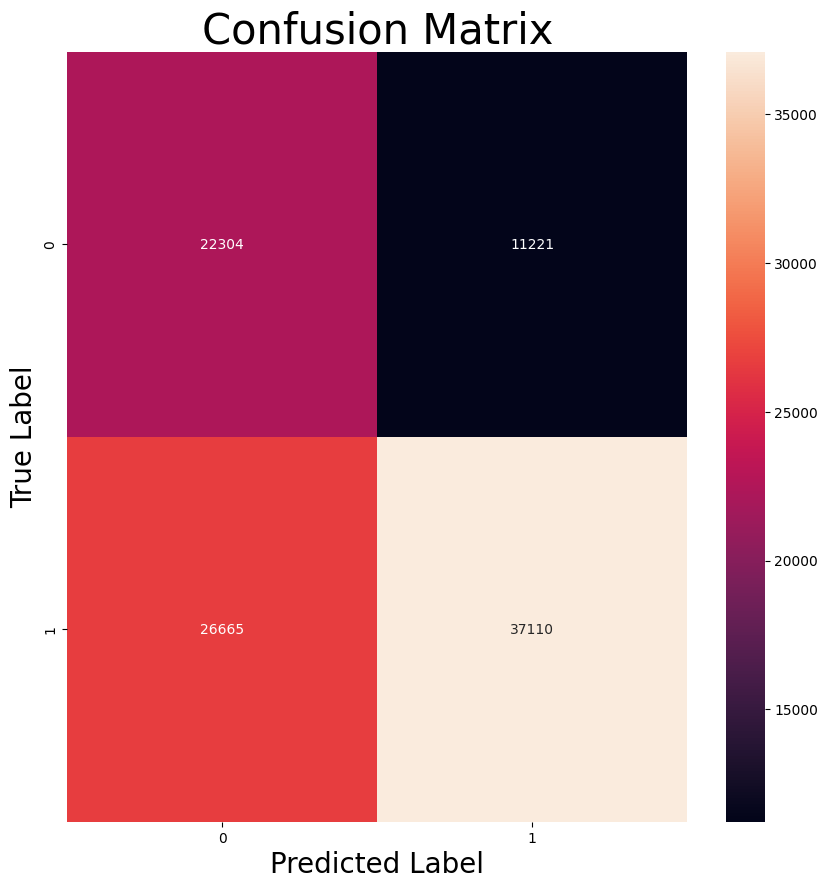


Train Loss:       0.2259
Validation Loss:  0.2234

Performance no conjunto de teste:


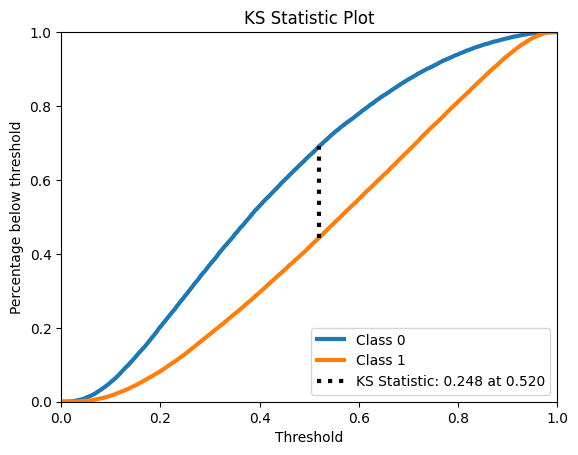


Accuracy:         0.6106
Recall:           0.5819
Precision:        0.7678
F1:               0.6621
AUROC:            0.6690
AUPR:             0.7847


In [23]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento 6

In [24]:
# history_file = HISTORY_PATH + "6.npy"
# model_file = MODEL_PATH + "6"

# classifier = KerasClassifier(build_fn=create_sklearn_compatible_model, batch_size = 64, epochs = 100, verbose = 1, callbacks=[EarlyStopping(patience=20,verbose=1)], validation_data=(x_val, y_val))

# if not exists(history_file) or  not exists(model_file):
#     history = classifier.fit(x_train, y_train)
#     np.save(history_file,history.history)
#     classifier.save(model_file)
# else:
#     print("Model was already trained")
    
# history=np.load(history_file, allow_pickle='TRUE').item()
# classifier = keras.models.load_model(model_file)

## MLP Ensemble

In [45]:
def sklearn_compatible_model(neurons:tuple,activation:tuple, optimizer="adam"):
    def mlp_generator():
        classifier = Sequential()
        classifier.add(Dense(neurons[0], activation=activation[0], input_dim=input_dim))
        classifier.add(Dense(neurons[-1], activation=activation[-1], input_dim=input_dim))
        classifier.add(Dense(1, activation='sigmoid'))
        classifier.compile(optimizer='adam', loss='mean_squared_error')
        return classifier
    return mlp_generator 

In [46]:
def keras_classifier_generator(neurons,activation,optimizer="adam",epochs=100,patience=10) -> KerasClassifier:
    classifier:KerasClassifier = KerasClassifier(build_fn=sklearn_compatible_model(
        neurons=neurons,
        activation=activation,
        optimizer=optimizer),
        batch_size=32,
        epochs=100,
        verbose=1,
        )
    classifier._estimator_type = "classifier"
    return classifier

### Experimento 1

In [47]:
mlp1=keras_classifier_generator(neurons=(64,32), activation=("relu","relu"))
mlp2=keras_classifier_generator(neurons=(64,32), activation=("sigmoid","sigmoid"))
mlp3=keras_classifier_generator(neurons=(64,32), activation=("tanh","tanh"))

mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp1)], 
                           voting='soft')

/tmp/ipykernel_12722/1402449592.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier:KerasClassifier = KerasClassifier(build_fn=sklearn_compatible_model(


In [48]:
mlp_ens.fit(x_train,y_train)

Epoch 1/100
7972/7972 [==============================] - 7s 868us/step - loss: 0.2274
Epoch 2/100
7972/7972 [==============================] - 7s 836us/step - loss: 0.2229
Epoch 3/100
7972/7972 [==============================] - 7s 855us/step - loss: 0.2211
Epoch 4/100
7972/7972 [==============================] - 7s 864us/step - loss: 0.2201
Epoch 5/100
7972/7972 [==============================] - 7s 837us/step - loss: 0.2189
Epoch 6/100
7972/7972 [==============================] - 7s 898us/step - loss: 0.2181
Epoch 7/100
7972/7972 [==============================] - 7s 848us/step - loss: 0.2172
Epoch 8/100
7972/7972 [==============================] - 7s 882us/step - loss: 0.2163
Epoch 9/100
7972/7972 [==============================] - 7s 840us/step - loss: 0.2155
Epoch 10/100
7972/7972 [==============================] - 7s 864us/step - loss: 0.2147
Epoch 11/100
7972/7972 [==============================] - 7s 818us/step - loss: 0.2140
Epoch 12/100
7972/7972 [============================

In [ ]:
MLP_ENSEMBLE_PATH = "Models/MLP_ENS"
MODEL_PATH = f"{MODELS_PATH}/model"
pickle.dump(mlp1,open())